In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
df = pd.read_csv('Ads_CTR_Optimisation.csv')
df.head(3)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


In [37]:
import math
N = 10000
ad_num = 10
ads_selected = []
selected_ads = [0] * ad_num
sum_reward = [0] * ad_num
total_reward = 0
for i in range(0, N):
    ad = 0
    max_upper_bound = 0
    for j in range(0, ad_num):
        if (selected_ads[j] > 0):
            average_reward = sum_reward[j] / selected_ads[j]
            conf_bound = math.sqrt(3 / 2 * math.log(i + 1) / selected_ads[j])
            upper_bound = average_reward + conf_bound
        else:
            upper_bound = 1e400
        if (upper_bound > max_upper_bound):
               max_upper_bound = upper_bound
               ad = j

ads_selected.append(ad)
selected_ads[ad] += 1
reward = df.values[i, ad]
sum_reward += reward
total_reward += reward


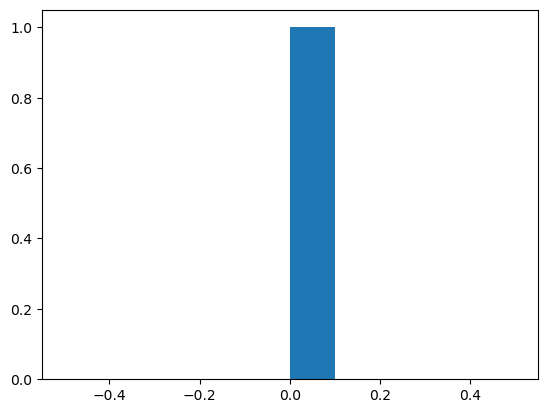

In [44]:
plt.hist(ads_selected)
plt.show()